In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Creating the grand dataset
df1 = pd.read_csv('/content/Youtube03-LMFAO.csv')
df2 = pd.read_csv('/content/Youtube01-Psy.csv')
df3 = pd.read_csv('/content/Youtube02-KatyPerry.csv')
df4 = pd.read_csv('/content/Youtube04-Eminem.csv')
df5 = pd.read_csv('/content/Youtube05-Shakira.csv')
mega_df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)
mega_df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [3]:
#dropping unimportant columns
mega_df.drop(['COMMENT_ID', 'AUTHOR', 'DATE'],axis=1,inplace=True)
mega_df

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


In [6]:
#checking the balance of the dataset
mega_df['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [7]:
accuracy_results = {}
#a loop that will iterate through the settings to find the most optimum value for state
for i in range(1,101):
    X_train,X_test,y_train,y_test=train_test_split(mega_df.CONTENT,mega_df.CLASS,test_size=0.2,random_state=i)
    # Convert comments to numerical features using TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=1807)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Train an SVM model
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    Y_pred = svm_model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, Y_pred)

    # Store the result in the dictionary
    accuracy_results[i] = accuracy

sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)
print("Top 5 Max Features and Accuracies:")
for i in range(5):
    max_features, accuracy = sorted_results[i]
    print(f"Max Features: {max_features}, Accuracy: {accuracy:.2%}")

Top 5 Max Features and Accuracies:
Max Features: 53, Accuracy: 98.47%
Max Features: 10, Accuracy: 98.21%
Max Features: 21, Accuracy: 97.19%
Max Features: 91, Accuracy: 97.19%
Max Features: 13, Accuracy: 96.94%


In [8]:
#applying the optimal settings
X_train,X_test,y_train,y_test=train_test_split(mega_df.CONTENT,mega_df.CLASS,test_size=0.2,random_state=53)
tfidf_vectorizer = TfidfVectorizer(max_features=1807)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
Y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, Y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 98.47%


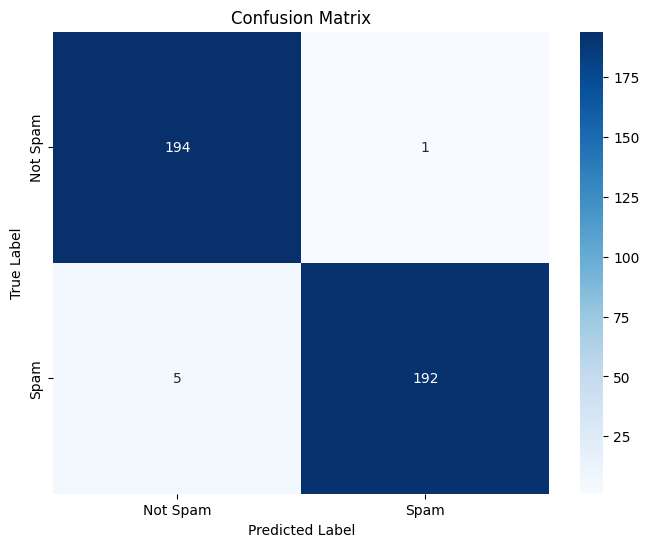

In [9]:
# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

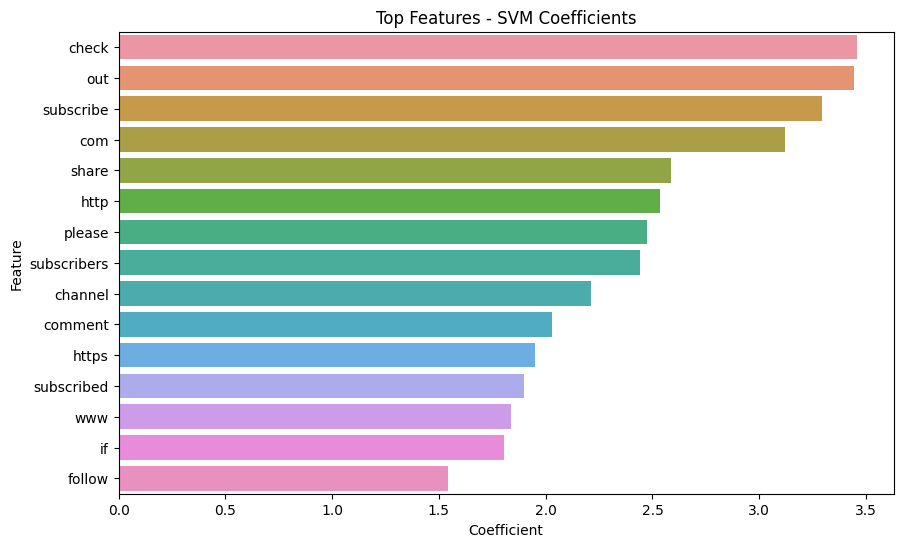

In [10]:
#Finding and visualizing the most important features in separating spam comments from non spam-comments
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = svm_model.coef_.toarray().flatten()
# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficients
sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot top N features
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coef_df.head(top_n))
plt.title('Top Features - SVM Coefficients')
plt.show()


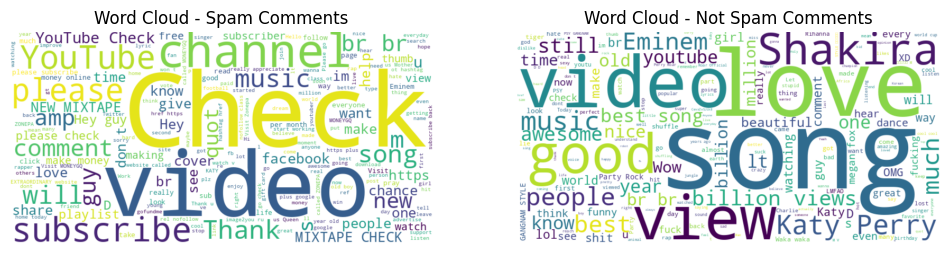

In [11]:
# Generating word clouds for spam and not spam comments
spam_comments = mega_df[mega_df['CLASS'] == 1]['CONTENT'].values
not_spam_comments = mega_df[mega_df['CLASS'] == 0]['CONTENT'].values

wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_comments))
wordcloud_not_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(not_spam_comments))

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud - Spam Comments')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_spam, interpolation='bilinear')
plt.title('Word Cloud - Not Spam Comments')
plt.axis('off')

plt.show()

In [14]:
#prediction model to use for further testing
comment =['hello guys check the link below for awesome gifts']
vectorized_comment = tfidf_vectorizer.transform(comment)
prediction = svm_model.predict(vectorized_comment)
if prediction[0] ==1:
  print('This input is most likely to be spam or unrelated')
else:
  print('There seems to be no issues with this comment')

This input is most likely to be spam or unrelated
